In [1]:
# import libraries 
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
from matplotlib import colorbar
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from pickle import dump, load

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

np.random_state = 42

## Load in Dataset

In [2]:
df = pd.read_csv('data/cleaned_df.csv', index_col = 0)
df.head()

,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,delinq_2yrs,years_credit,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,application_type,open_act_il,open_il_24m,open_rv_24m,all_util,total_rev_hi_lim,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,total_bal_ex_mort,total_bc_limit
0,4000,36 months,11.99,132.84,8 years,RENT,45000.0,Fully Paid,debt_consolidation,AZ,0.67,0,12,744,1.0,0.0,7,1102,6.9,9,Individual,0.0,0.0,4.0,7.0,15900,5.0,4,6398.0,14.7,0,14.0,0.0,0.0,0,9,1,7,0,1,100.0,0.0,0,1102,7500
1,7200,36 months,11.47,237.33,< 1 year,RENT,85000.0,Current,debt_consolidation,OR,10.17,0,20,669,2.0,35.0,6,13964,90.1,10,Individual,2.0,0.0,2.0,68.0,15500,2.0,2,951.0,93.2,0,4.0,0.0,0.0,0,8,4,6,0,2,90.0,100.0,0,33021,14000
2,20000,36 months,16.29,706.01,8 years,MORTGAGE,56000.0,Current,debt_consolidation,FL,33.71,0,19,664,0.0,39.0,21,11198,49.1,33,Individual,7.0,1.0,11.0,73.0,22800,0.0,12,2074.0,78.6,3,14.0,0.0,0.0,0,20,12,21,0,4,96.6,75.0,2,54298,9700
3,16000,60 months,12.99,363.97,5 years,MORTGAGE,110000.0,Current,debt_consolidation,IL,20.53,0,36,674,1.0,35.0,14,40709,78.1,25,Individual,1.0,0.0,7.0,67.0,52100,2.0,7,1221.0,96.9,3,7.0,35.0,35.0,2,21,11,14,0,2,68.0,87.5,0,45733,39400
4,28000,60 months,15.31,670.69,3 years,MORTGAGE,180000.0,Current,debt_consolidation,TN,24.56,0,26,684,0.0,37.0,14,128213,96.0,33,Individual,5.0,2.0,2.0,76.0,127800,2.0,5,1138.0,97.8,4,10.0,37.0,37.0,0,14,7,14,0,5,93.9,100.0,0,273107,51800


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413177 entries, 0 to 438990
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   funded_amnt                     413177 non-null  int64  
 1   term                            413177 non-null  object 
 2   int_rate                        413177 non-null  float64
 3   installment                     413177 non-null  float64
 4   emp_length                      413177 non-null  object 
 5   home_ownership                  413177 non-null  object 
 6   annual_inc                      413177 non-null  float64
 7   loan_status                     413177 non-null  object 
 8   purpose                         413177 non-null  object 
 9   addr_state                      413177 non-null  object 
 10  dti                             413177 non-null  float64
 11  delinq_2yrs                     413177 non-null  int64  
 12  years_credit    

## Preprocessing Features

#### Establish order of ordinal columns

In [4]:
df.columns

Index(['funded_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'loan_status', 'purpose', 'addr_state',
       'dti', 'delinq_2yrs', 'years_credit', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'application_type', 'open_act_il',
       'open_il_24m', 'open_rv_24m', 'all_util', 'total_rev_hi_lim',
       'inq_last_12m', 'acc_open_past_24mths', 'bc_open_to_buy', 'bc_util',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'total_bal_ex_mort',
       'total_bc_limit'],
      dtype='object')

In [5]:
# identify ordinal columns and define order of the features
# only ordinal column is emp_length
emp_length_list = ['< 1 year',
                   '1 year',
                   '2 years',
                   '3 years',
                   '4 years',
                   '5 years',
                   '6 years',
                   '7 years',
                   '8 years',
                   '9 years',
                   '10+ years']

In [6]:
# convert to type category
df['emp_length'] = df['emp_length'].astype('category')

In [7]:
# get all nominal columns
nominal_cols = list(df.select_dtypes(include='object').columns)

# get all ordinal columns
ordinal_cols = list(df.select_dtypes(include='category').columns)

# get all numeric columns
numeric_cols = list(df.select_dtypes(include= ['int', 'float']).columns)

In [8]:
# get counts of cols
print(len(nominal_cols), "Nominal Columns:", nominal_cols)
print("")
print(len(ordinal_cols), "Ordinal Columns:", ordinal_cols)
print("")
print(len(numeric_cols), "Numeric Columns:", numeric_cols)

6 Nominal Columns: ['term', 'home_ownership', 'loan_status', 'purpose', 'addr_state', 'application_type']

1 Ordinal Columns: ['emp_length']

38 Numeric Columns: ['funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'years_credit', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'open_act_il', 'open_il_24m', 'open_rv_24m', 'all_util', 'total_rev_hi_lim', 'inq_last_12m', 'acc_open_past_24mths', 'bc_open_to_buy', 'bc_util', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'total_bal_ex_mort', 'total_bc_limit']


### Building pipeline transformer

In [9]:
# define a nominal transformation pipeline that OHE the cats
nominal_pipeline = Pipeline([('onehotenc', OneHotEncoder(sparse = False))])

# define an ordinal transformation pipeline that ordinal encodes the cats
ordinal_pipeline = Pipeline([('ordinalenc', OrdinalEncoder(categories = [emp_length_list]))])

# define numeric transformation pipeline that scales the numbers
numeric_pipeline = Pipeline([('numnorm', StandardScaler())]) 

In [10]:
# construct column transformer for the selected columns with pipelines
ct = ColumnTransformer(transformers = [("nominalpipe", nominal_pipeline, nominal_cols),
                                       ("ordinalpipe", ordinal_pipeline, ordinal_cols),
                                       ("numericpipe", numeric_pipeline, numeric_cols)])

In [11]:
# save the column transformer
dump(ct, open('pkl/column_transformer.pkl', 'wb'))

#### Reorder dataframe for simplicity of feature name retrieval

In [12]:
# reorder the df with nominal first, ordinal second, and remaining numeric last
ordered_cols = nominal_cols + ordinal_cols + numeric_cols
df = df[ordered_cols]

In [13]:
df.head()

,term,home_ownership,loan_status,purpose,addr_state,application_type,emp_length,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,years_credit,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,open_act_il,open_il_24m,open_rv_24m,all_util,total_rev_hi_lim,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,total_bal_ex_mort,total_bc_limit
0,36 months,RENT,Fully Paid,debt_consolidation,AZ,Individual,8 years,4000,11.99,132.84,45000.0,0.67,0,12,744,1.0,0.0,7,1102,6.9,9,0.0,0.0,4.0,7.0,15900,5.0,4,6398.0,14.7,0,14.0,0.0,0.0,0,9,1,7,0,1,100.0,0.0,0,1102,7500
1,36 months,RENT,Current,debt_consolidation,OR,Individual,< 1 year,7200,11.47,237.33,85000.0,10.17,0,20,669,2.0,35.0,6,13964,90.1,10,2.0,0.0,2.0,68.0,15500,2.0,2,951.0,93.2,0,4.0,0.0,0.0,0,8,4,6,0,2,90.0,100.0,0,33021,14000
2,36 months,MORTGAGE,Current,debt_consolidation,FL,Individual,8 years,20000,16.29,706.01,56000.0,33.71,0,19,664,0.0,39.0,21,11198,49.1,33,7.0,1.0,11.0,73.0,22800,0.0,12,2074.0,78.6,3,14.0,0.0,0.0,0,20,12,21,0,4,96.6,75.0,2,54298,9700
3,60 months,MORTGAGE,Current,debt_consolidation,IL,Individual,5 years,16000,12.99,363.97,110000.0,20.53,0,36,674,1.0,35.0,14,40709,78.1,25,1.0,0.0,7.0,67.0,52100,2.0,7,1221.0,96.9,3,7.0,35.0,35.0,2,21,11,14,0,2,68.0,87.5,0,45733,39400
4,60 months,MORTGAGE,Current,debt_consolidation,TN,Individual,3 years,28000,15.31,670.69,180000.0,24.56,0,26,684,0.0,37.0,14,128213,96.0,33,5.0,2.0,2.0,76.0,127800,2.0,5,1138.0,97.8,4,10.0,37.0,37.0,0,14,7,14,0,5,93.9,100.0,0,273107,51800


## Transforming

In [14]:
df_pp = pd.DataFrame(ct.fit_transform(df))

In [15]:
df_pp.shape

(413177, 118)

In [16]:
df_pp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,-1.142381,-0.263139,-1.106399,-0.403527,-1.267506,-0.372529,-1.546100,1.402359,0.568722,-0.766710,-0.801141,-0.748434,-1.769135,-1.234348,-0.926819,-0.992817,0.474893,-2.586199,-0.547992,1.218479,-0.192254,-0.248031,-1.532005,-0.807412,-0.319510,-0.475865,-0.582318,-0.384667,-0.553490,-1.374970,-0.795633,-0.17222,-0.595682,0.685177,-1.156508,-0.374003,-1.031729,-0.804972
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.787118,-0.366309,-0.717439,0.117790,-0.611559,-0.372529,-0.498593,-0.983510,1.779113,0.744171,-0.983252,-0.039325,1.647437,-1.148158,-0.271930,-0.992817,-0.304138,0.415773,-0.563893,-0.036776,-0.813270,-0.789077,1.255157,-0.807412,-0.623751,-0.475865,-0.582318,-0.384667,-0.686161,-0.433784,-0.978418,-0.17222,-0.059536,-0.353305,1.604564,-0.374003,-0.355407,-0.354025
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.633932,0.590000,1.027207,-0.260165,1.013807,-0.372529,-0.629531,-1.142568,-0.641669,0.916843,1.748408,-0.191821,-0.036211,0.834203,1.365293,-0.364752,3.201500,0.661837,-0.273689,-0.873612,2.291809,-0.677531,0.736780,0.901915,-0.319510,-0.475865,-0.582318,-0.384667,0.905891,2.076044,1.763357,-0.17222,1.012756,0.332093,0.914296,4.702442,0.095424,-0.652344
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.189854,-0.064734,-0.246026,0.443613,0.103767,-0.372529,1.596422,-0.824452,0.568722,0.744171,0.473633,1.435182,1.154662,0.144686,-0.599374,-0.992817,1.643439,0.366561,0.891101,-0.036776,0.739269,-0.762258,1.386526,0.901915,-0.532479,1.267945,1.054661,0.985265,1.038562,1.762316,0.483862,-0.17222,-0.059536,-2.637967,1.259430,-0.374003,-0.086057,1.408137
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.522088,0.395564,0.895729,1.355917,0.382027,-0.372529,0.287038,-0.506336,-0.641669,0.830507,0.473633,6.259459,1.889718,0.834203,0.710404,0.263312,-0.304138,0.809475,3.900475,-0.036776,0.118254,-0.770503,1.418481,1.471690,-0.441206,1.367592,1.148203,-0.384667,0.109865,0.507401,0.483862,-0.17222,1.548902,0.051703,1.604564,-0.374003,4.731696,2.268405


### Get Feature Names and Assign to `df_pp`

In [17]:
# get nominal values
nominal_features = list(nominal_pipeline.named_steps['onehotenc'].fit(df[nominal_cols]).get_feature_names())

In [18]:
# get nominal values
ordinal_features = list(nominal_pipeline.named_steps['onehotenc'].fit(df[ordinal_cols]).get_feature_names())

In [19]:
print(len(nominal_features), "Nominal Encoded Feature Names:", nominal_features[0:5], "...")
print("")
print(len(ordinal_features), "Ordinal Encoded Feature Names:", ordinal_features[0:5], "...")
print("")
print(len(numeric_cols), "Numeric Features", numeric_cols[0:5], "...")

79 Nominal Encoded Feature Names: ['x0_ 36 months', 'x0_ 60 months', 'x1_ANY', 'x1_MORTGAGE', 'x1_NONE'] ...

11 Ordinal Encoded Feature Names: ['x0_1 year', 'x0_10+ years', 'x0_2 years', 'x0_3 years', 'x0_4 years'] ...

38 Numeric Features ['funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti'] ...


### Cleaning feature names

In [20]:
features_to_clean = nominal_features
features_to_clean

['x0_ 36 months',
 'x0_ 60 months',
 'x1_ANY',
 'x1_MORTGAGE',
 'x1_NONE',
 'x1_OWN',
 'x1_RENT',
 'x2_Charged Off',
 'x2_Current',
 'x2_Fully Paid',
 'x2_In Grace Period',
 'x2_Late (16-30 days)',
 'x2_Late (31-120 days)',
 'x3_car',
 'x3_credit_card',
 'x3_debt_consolidation',
 'x3_educational',
 'x3_home_improvement',
 'x3_house',
 'x3_major_purchase',
 'x3_medical',
 'x3_moving',
 'x3_other',
 'x3_renewable_energy',
 'x3_small_business',
 'x3_vacation',
 'x3_wedding',
 'x4_AK',
 'x4_AL',
 'x4_AR',
 'x4_AZ',
 'x4_CA',
 'x4_CO',
 'x4_CT',
 'x4_DC',
 'x4_DE',
 'x4_FL',
 'x4_GA',
 'x4_HI',
 'x4_ID',
 'x4_IL',
 'x4_IN',
 'x4_KS',
 'x4_KY',
 'x4_LA',
 'x4_MA',
 'x4_MD',
 'x4_ME',
 'x4_MI',
 'x4_MN',
 'x4_MO',
 'x4_MS',
 'x4_MT',
 'x4_NC',
 'x4_ND',
 'x4_NE',
 'x4_NH',
 'x4_NJ',
 'x4_NM',
 'x4_NV',
 'x4_NY',
 'x4_OH',
 'x4_OK',
 'x4_OR',
 'x4_PA',
 'x4_RI',
 'x4_SC',
 'x4_SD',
 'x4_TN',
 'x4_TX',
 'x4_UT',
 'x4_VA',
 'x4_VT',
 'x4_WA',
 'x4_WI',
 'x4_WV',
 'x4_WY',
 'x5_Individual',
 'x5_

In [21]:
def clean_features(features_to_clean):
    # Define the prefix to remove
    prefix = "x0 "
    
    # Initialize a new list to store the modified strings
    modified_strings = []

    # Loop through each string in the input list
    for s in features_to_clean:
        # Find the index of the first occurrence of "_"
        index_of_underscore = s.find('_')
        
        # Check if "_" is present in the string
        if index_of_underscore != -1:
            # Remove everything to the left of "_" and remove spaces
            modified_string = s[index_of_underscore + 1:].lstrip()
            modified_strings.append(modified_string)
        else:
            # If "_" is not present, append the string as it is
            modified_strings.append(s)
    
    return modified_strings

In [22]:
cleaned_features = clean_features(features_to_clean)
cleaned_features[:10]

['36 months',
 '60 months',
 'ANY',
 'MORTGAGE',
 'NONE',
 'OWN',
 'RENT',
 'Charged Off',
 'Current',
 'Fully Paid']

In [23]:
# redefine the column names
df_pp.columns = cleaned_features + ordinal_cols + numeric_cols

In [24]:
df_pp

,36 months,60 months,ANY,MORTGAGE,NONE,OWN,RENT,Charged Off,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Individual,Joint App,emp_length,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,years_credit,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,open_act_il,open_il_24m,open_rv_24m,all_util,total_rev_hi_lim,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,total_bal_ex_mort,total_bc_limit
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,-1.142381,-0.263139,-1.106399,-0.403527,-1.267506,-0.372529,-1.546100,1.402359,0.568722,-0.766710,-0.801141,-0.748434,-1.769135,-1.234348,-0.926819,-0.992817,0.474893,-2.586199,-0.547992,1.218479,-0.192254,-0.248031,-1.532005,-0.807412,-0.319510,-0.475865,-0.582318,-0.384667,-0.553490,-1.374970,-0.795633,-0.172220,-0.595682,0.685177,-1.156508,-0.374003,-1.031729,-0.804972
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.787118,-0.366309,-0.717439,0.117790,-0.611559,-0.372529,-0.498593,-0.983510,1.779113,0.744171,-0.983252,-0.039325,1.647437,-1.148158,-0.271930,-0.992817,-0.304138,0.415773,-0.563893,-0.036776,-0.813270,-0.789077,1.255157,-0.807412,-0.623751,-0.475865,-0.582318,-0.384667,-0.686161,-0.433784,-0.978418,-0.172220,-0.059536,-0.353305,1.604564,-0.374003,-0.355407,-0.354025
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.633932,0.590000,1.027207,-0.260165,1.013807,-0.372529,-0.629531,-1.142568,-0.641669,0.916843,1.748408,-0.191821,-0.036211,0.834203,1.365293,-0.364752,3.201500,0.661837,-0.273689,-0.873612,2.291809,-0.677531,0.736780,0.901915,-0.319510,-0.475865,-0.582318,-0.384667,0.905891,2.076044,1.763357,-0.172220,1.012756,0.332093,0.914296,4.702442,0.095424,-0.652344
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.189854,-0.064734,-0.246026,0.443613,0.103767,-0.372529,1.596422,-0.824452,0.568722,0.744171,0.473633,1.435182,1.154662,0.144686,-0.599374,-0.992817,1.643439,0.366561,0.891101,-0.036776,0.739269,-0.762258,1.386526,0.901915,-0.532479,1.267945,1.054661,0.985265,1.038562,1.762316,0.483862,-0.172220,-0.059536,-2.637967,1.259430,-0.374003,-0.086057,1.408137
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

## Stratified Sampling for a Smaller Dataset

In [90]:
# Define the desired sample size
sample_size = 20000

# Create a smaller sample DataFrame by randomly sampling with replacement
sample_df = df_pp.sample(n=sample_size, replace=True)

In [91]:
sample_df

,36 months,60 months,ANY,MORTGAGE,NONE,OWN,RENT,Charged Off,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Individual,Joint App,emp_length,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,years_credit,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,open_act_il,open_il_24m,open_rv_24m,all_util,total_rev_hi_lim,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,total_bal_ex_mort,total_bc_limit
304203,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,-0.032185,0.941176,-0.275805,0.326317,-0.072302,-0.372529,1.072668,-0.824452,-0.641669,0.960011,0.655744,-0.146392,0.493522,0.230876,0.055515,-0.992817,0.474893,-0.420842,-0.408853,-0.036776,-0.192254,-0.365339,0.388829,-0.807412,-0.319510,-0.475865,-0.582318,-0.384667,0.375207,1.448587,0.666647,-0.17222,-1.131828,0.290554,0.378648,-0.374003,0.309408,-0.166709
391723,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.854323,-0.574634,3.233066,0.161672,-0.456894,-0.372529,-0.498593,-0.188220,-0.641669,-0.766710,-0.983252,-0.603051,-0.418111,-0.372451,0.055515,0.891377,-0.693653,0.120497,-0.806392,-0.455194,-0.192254,-0.321237,-0.640823,-0.237637,-0.532479,-0.475865,-0.582318,-0.384667,-1.084174,-1.061241,-0.978418,-0.17222,0.476610,0.685177,-1.156508,2.164220,-0.424292,-0.673157
109089,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.767156,0.590000,1.184890,-0.299263,-0.456204,-0.372529,0.287038,-0.983510,-0.641669,1.391692,0.291522,-0.446145,-0.750734,-0.286262,-0.271930,-0.992817,0.864408,-0.371629,-0.353197,-0.036776,0.118254,-0.450464,0.023125,-0.807412,-0.562903,2.015293,1.756224,0.985265,0.507878,0.193673,0.301077,-0.17222,0.476610,-0.467539,0.224028,-0.374003,-0.545957,-0.596843
247476,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,-0.476263,0.728883,-0.273907,-0.273198,0.506311,-0.372529,-0.367655,-0.347278,-0.641669,1.305355,-1.165363,-0.568869,0.579758,-1.061968,-0.271930,0.263312,-0.693653,1.006325,-0.909752,-0.873612,-0.502762,-0.759676,0.676422,0.332139,0.319398,-0.475865,-0.582318,-0.384667,-1.349516,-0.747513,-1.161203,-0.17222,-0.059536,-0.259842,0.224028,-0.374003,-0.229886,-0.950663
367067,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Clustering: Visualizing the Pre-Processed Dataset

In [92]:
import umap

In [94]:
# embedding = umap.UMAP(n_neighbors=10, min_dist= .9).fit_transform(df_pp)

In [95]:
# smaller sample
embedding2 = umap.UMAP(n_neighbors=10, min_dist= .9).fit_transform(sample_df)

In [27]:
# np.save('data/embedding_plot.npy', embedding)

In [96]:
np.save('data/embedding_plot2.npy', embedding2)

In [97]:
# embedding = np.load('data/embedding_plot.npy')

# fig, ax = plt.subplots(figsize = (12,12))
# sns.scatterplot(*embedding.T, s = 5, alpha = 1)
# plt.show()

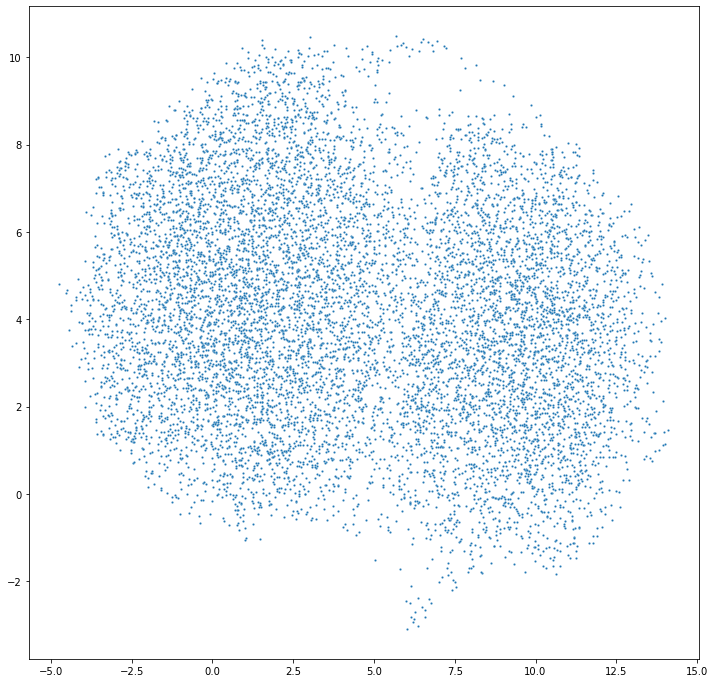

In [98]:
embedding2 = np.load('data/embedding_plot2.npy')

fig, ax = plt.subplots(figsize = (12,12))
sns.scatterplot(*embedding.T, s = 5, alpha = 1)
plt.show()

In [99]:
# sns.jointplot(*embedding.T, kind = 'hex', height = 12)
# plt.show()

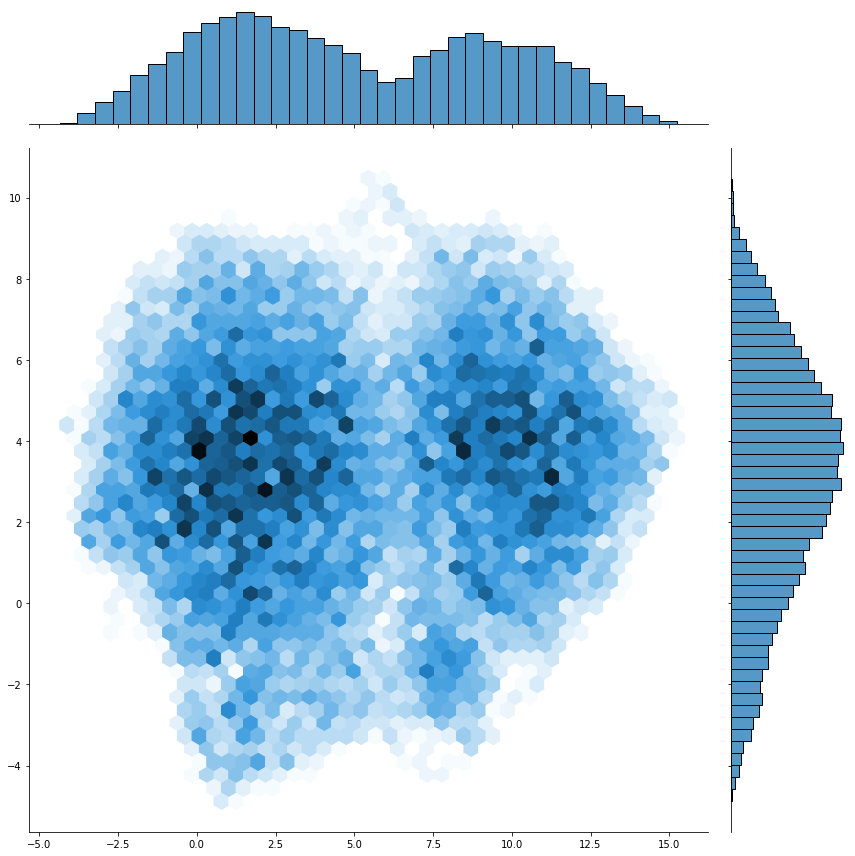

In [100]:
sns.jointplot(*embedding2.T, kind = 'hex', height = 12)
plt.show()

## Finding N-Clusters

In [101]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

### Determining Best Number of Clusters to Select

In [102]:
# stores predicted clustering results
results=[]
kmeans_predictions = []

# iterates for a clustering range of k = 2 to 50
for k in range(2, 50):
    kmeans = MiniBatchKMeans(n_clusters=k).fit(sample_df)
    predict = kmeans.predict(sample_df)
    result = {
        'k':k,
        'inertia': kmeans.inertia_,                      # get inertia score for each iteration of k
        'silhouette': silhouette_score(sample_df, predict),  # get silhouette score
    }
    results.append(result)
    kmeans_predictions.append(predict)
    print(result, end='\r')
    
cluster_results = pd.DataFrame(results)

In [74]:
# # stores predicted clustering results
# results=[]
# kmeans_predictions = []

# # iterates for a clustering range of k = 2 to 4
# kmeans = MiniBatchKMeans(n_clusters=4, batch_size= 5024).fit(df_pp)
# predict = kmeans.predict(df_pp)
# result = {
#     'k':4,
#     'inertia': kmeans.inertia_,                      # get inertia score for each iteration of k
#     'silhouette': silhouette_score(df_pp, predict),  # get silhouette score
# }
# results.append(result)
# kmeans_predictions.append(predict)
# print(result, end='\r')

# cluster_results = pd.DataFrame(results)

#### Define cluster size

In [103]:
cluster_results.to_csv('data/cluster_results')

In [124]:
cluster_results = pd.read_csv('data/cluster_results', index_col= 0)

clusters = 5

In [125]:
cluster_results

,k,inertia,silhouette
0,2,907311.966362,0.221246
1,3,879013.696848,0.167674
2,4,847998.985144,0.146976
3,5,809908.835570,0.095065
4,6,802601.272409,0.075396
5,7,776248.457184,0.060473
6,8,777673.818737,0.064794
7,9,749713.991043,0.060417
8,10,741431.314344,0.048299
9,11,723487.663405,0.063771


#### Plot Inertia

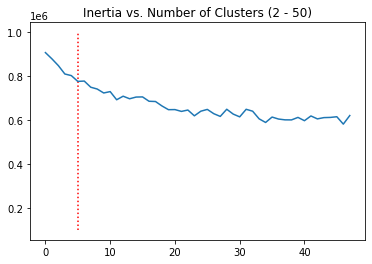

In [126]:
fig, ax = plt.subplots()
ax.set_title('Inertia vs. Number of Clusters (2 - 50)')
cluster_results.inertia.plot(ax=ax)
ax.vlines(x=clusters, ymin=100000, ymax=1000000, colors='red', linestyles='dotted')
plt.show()

#### Plot Silohouette Score

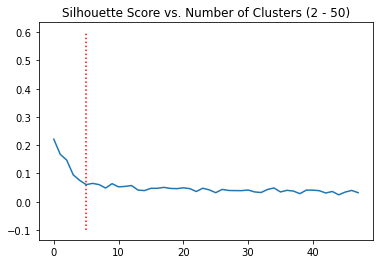

In [127]:
fig, ax = plt.subplots()
ax.set_title('Silhouette Score vs. Number of Clusters (2 - 50)')
cluster_results.silhouette.plot()
ax.vlines(x=clusters, ymin=-.1, ymax=.6, colors='red', linestyles='dotted')
plt.show()

In [128]:
kmeans = MiniBatchKMeans(n_clusters = clusters, random_state = 42).fit(sample_df)
kmeans

MiniBatchKMeans(n_clusters=5, random_state=42)

In [129]:
# labels for each cluster
pred_labels = np.unique(kmeans.predict(sample_df))
pred_labels

array([0, 1, 2, 3, 4], dtype=int32)

In [130]:
# get prediction on sd_pp to get labels
cluster_labels = pd.Series(kmeans.predict(sample_df), index = sample_df.index)

# convert predicted cluster labels to a list
cluster_list = cluster_labels.values.tolist()

In [131]:
# insert cluster label to the sample_df
df_clustered = sample_df.copy()
df_clustered.insert(1, 'cluster_label', cluster_list)

df_clustered.head()

,36 months,cluster_label,60 months,ANY,MORTGAGE,NONE,OWN,RENT,Charged Off,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Individual,Joint App,emp_length,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,years_credit,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,open_act_il,open_il_24m,open_rv_24m,all_util,total_rev_hi_lim,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,total_bal_ex_mort,total_bc_limit
304203,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,-0.032185,0.941176,-0.275805,0.326317,-0.072302,-0.372529,1.072668,-0.824452,-0.641669,0.960011,0.655744,-0.146392,0.493522,0.230876,0.055515,-0.992817,0.474893,-0.420842,-0.408853,-0.036776,-0.192254,-0.365339,0.388829,-0.807412,-0.319510,-0.475865,-0.582318,-0.384667,0.375207,1.448587,0.666647,-0.17222,-1.131828,0.290554,0.378648,-0.374003,0.309408,-0.166709
391723,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.854323,-0.574634,3.233066,0.161672,-0.456894,-0.372529,-0.498593,-0.188220,-0.641669,-0.766710,-0.983252,-0.603051,-0.418111,-0.372451,0.055515,0.891377,-0.693653,0.120497,-0.806392,-0.455194,-0.192254,-0.321237,-0.640823,-0.237637,-0.532479,-0.475865,-0.582318,-0.384667,-1.084174,-1.061241,-0.978418,-0.17222,0.476610,0.685177,-1.156508,2.164220,-0.424292,-0.673157
109089,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.767156,0.590000,1.184890,-0.299263,-0.456204,-0.372529,0.287038,-0.983510,-0.641669,1.391692,0.291522,-0.446145,-0.750734,-0.286262,-0.271930,-0.992817,0.864408,-0.371629,-0.353197,-0.036776,0.118254,-0.450464,0.023125,-0.807412,-0.562903,2.015293,1.756224,0.985265,0.507878,0.193673,0.301077,-0.17222,0.476610,-0.467539,0.224028,-0.374003,-0.545957,-0.596843
247476,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,-0.476263,0.728883,-0.273907,-0.273198,0.506311,-0.372529,-0.367655,-0.347278,-0.641669,1.305355,-1.165363,-0.568869,0.579758,-1.061968,-0.271930,0.263312,-0.693653,1.006325,-0.909752,-0.873612,-0.502762,-0.759676,0.676422,0.332139,0.319398,-0.475865,-0.582318,-0.384667,-1.349516,-0.747513,-1.161203,-0.17222,-0.059536,-0.259842,0.224028,-0.374003,-0.229886,-0.950663
367067,1.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [132]:
# save as csv
path = "data/"

df_clustered.to_csv(path + 'df_clustered')

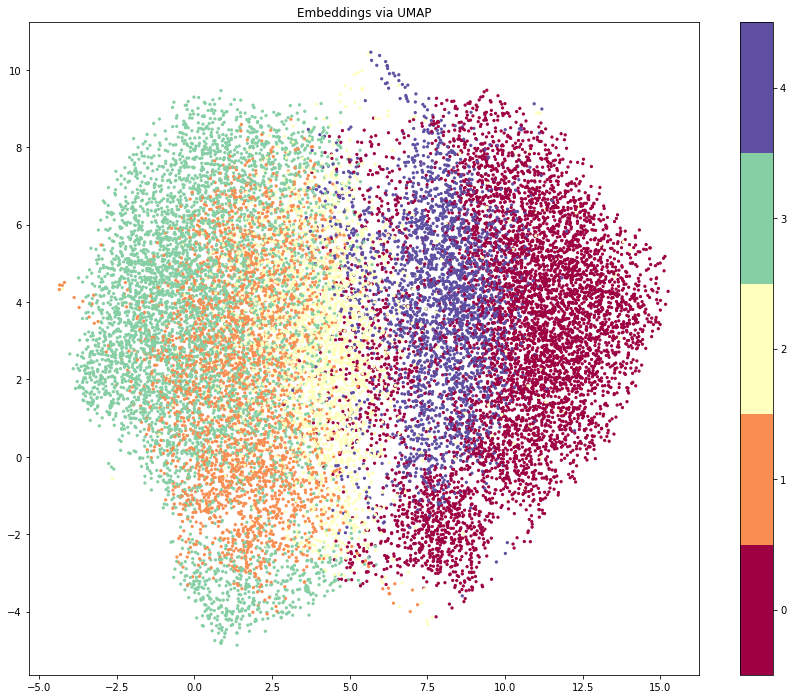

In [133]:
# plot 4 clusters with UMAP 
fig, ax = plt.subplots(figsize = (15,12))

plt.scatter(*embedding2.T, s = 5, alpha = 1, c = kmeans.predict(sample_df), cmap = 'Spectral')

labels = sorted(list(cluster_labels.unique())) # cluster labels

cbar = plt.colorbar(boundaries=np.arange(6)-0.5) # 4 cluster labels
cbar.set_ticks(np.arange(5))
cbar.set_ticklabels(labels)
plt.title('Embeddings via UMAP');

plt.show()